In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load in dataset
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

print(df.shape)
df.head()

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [21]:
# import packages

import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing




In [22]:
# split training set
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns = ['Diabetes_binary']), train['Diabetes_binary']
X_test, y_test = test.drop(columns = ['Diabetes_binary']), test['Diabetes_binary']
assert X_train.shape[0] == len(y_train)

# scale data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# create model
clf = LogisticRegression()

# fit model
clf.fit(X_train, y_train)

# create prediction
pred_labels = clf.predict(X_test) # predicted label of diabetes


# report evalutation score metrics
acc_score = accuracy_score(y_true = y_test, y_pred = pred_labels)
pre_score = precision_score(y_true = y_test, y_pred = pred_labels)
rec_score = recall_score(y_true = y_test, y_pred = pred_labels)
f1 = f1_score(y_true = y_test, y_pred = pred_labels)
mse = mean_squared_error(y_true = y_test, y_pred = pred_labels)

print(f"accuracy: {acc_score}")
print(f"precision: {pre_score}")
print(f"recall: {rec_score}")
print(f"f1: {f1}")
print(f"mse:{mse}")

print(classification_report(y_test, pred_labels)) 

accuracy: 0.7429096824386449
precision: 0.7318713843670119
recall: 0.7681445919231855
f1: 0.7495694109541853
mse:0.25709031756135514
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7057
         1.0       0.73      0.77      0.75      7082

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



C:\Users\nodna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


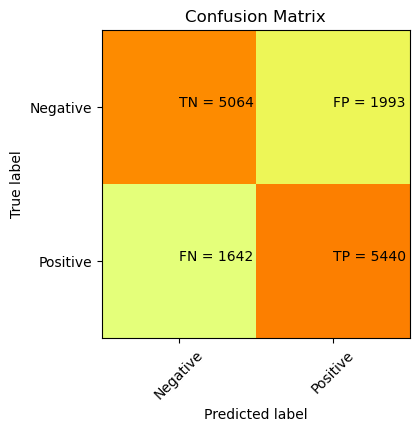

In [23]:
# create confusion matrix
def confusio_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(4,4))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()
confusio_matrix(y_test, pred_labels)